In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#@title Funciones auxiliares

def graficar(datos):

    path = "./"+ datos + ".dat"
    data = pd.read_csv(path,sep=' ',names=['t','x1','x2'])

    figs, axs = plt.subplots(2,1,figsize = (12,10))

    axs[0].plot(data['t'],data["x1"], "r-")
    axs[0].set_title(r'Grafica de $f1$ en funcion de t')
    axs[0].set_xlabel('Tiempo')
    axs[0].set_ylabel(r'$f_1$')

    axs[1].plot(data['t'],data["x2"], "b-")
    axs[1].set_title(r'Grafica de $f2$ en funcion de t')
    axs[1].set_xlabel('Tiempo')
    axs[1].set_ylabel(r'$f_2$')


In [ ]:
%%writefile RungeKutta4.cpp

#include <iostream>
#include <cmath>
using namespace std;

const double T=M_PI;
const double omega = 2*M_PI/T;
const double omega2 = omega*omega;

double f1(double t, double x1, double x2){
    return -omega2*x2;
}


double f2(double t, double x1, double x2){
    return x1;
}

void UnPasoRungeKutta4Acoplado(double & t, double & x1, double & x2, double dt){

    double dx11, dx21, dx31, dx41;                double dx12, dx22, dx32, dx42;

    dx11 = dt*f1(t,x1,x2);                        dx12 = dt*f2(t,x1,x2);
    dx21 = dt*f1(t + dt/2, x1+dx11/2, x2+dx12/2); dx22 = dt*f2(t + dt/2, x1+dx11/2, x2+dx12/2);
    dx31 = dt*f1(t + dt/2, x1+dx21/2, x2+dx22/2); dx32 = dt*f2(t + dt/2, x1+dx21/2, x2+dx22/2);
    dx41 = dt*f1(t + dt, x1+dx31, x2+dx32);       dx42 = dt*f2(t + dt, x1+dx31, x2+dx32);
    x1+=(dx11+2*(dx21+dx31)+dx41)/6;              x2+=(dx12+2*(dx22+dx32)+dx42)/6;

    t+=dt;
}

int main(void){
  double t, x1, x2;
  double dt = 0.1;

  for(t=0,x1=1,x2=0;t<2*T;){
    cout << t <<" "<< x1 <<" "<< x2 << endl;
    UnPasoRungeKutta4Acoplado(t, x1, x2, dt);
    }
    return 0;
}

Writing RungeKutta4.cpp


In [ ]:
%%shell
g++ RungeKutta4.cpp
./a.out > datos1.dat

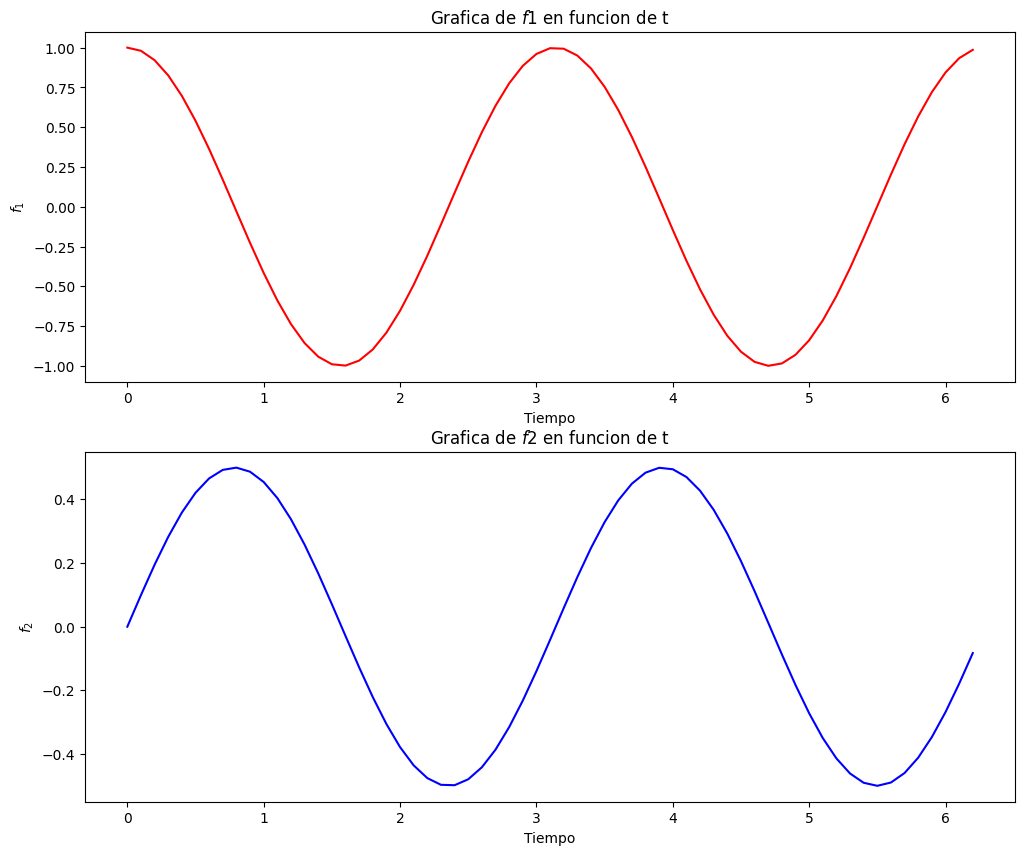

In [ ]:
graficar("datos1")

In [ ]:
M_PI=np.pi
T=M_PI;
omega = 2*M_PI/T;
omega2 = omega*omega;

def  f1(  t,   x1,   x2):
    return -omega2*x2;



def f2(  t,   x1,   x2):
    return x1;


def UnPasoRungeKutta4Acoplado( t, x1, x2, dt):

    dx11, dx21, dx31, dx41 = 0,0,0,0;             dx12, dx22, dx32, dx42 = 0,0,0,0;

    dx11 = dt*f1(t,x1,x2);                        dx12 = dt*f2(t,x1,x2);
    dx21 = dt*f1(t + dt/2, x1+dx11/2, x2+dx12/2); dx22 = dt*f2(t + dt/2, x1+dx11/2, x2+dx12/2);
    dx31 = dt*f1(t + dt/2, x1+dx21/2, x2+dx22/2); dx32 = dt*f2(t + dt/2, x1+dx21/2, x2+dx22/2);
    dx41 = dt*f1(t + dt, x1+dx31, x2+dx32);       dx42 = dt*f2(t + dt, x1+dx31, x2+dx32);
    x1+=(dx11+2*(dx21+dx31)+dx41)/6;              x2+=(dx12+2*(dx22+dx32)+dx42)/6;

    t+=dt;

    return t, x1, x2


if __name__ == "__main__":

    t, x1, x2 = 0,1,0
    dt = 0.1;

    with open('datos2.dat', 'w') as file:
        while t < 2 * T:
            file.write(f"{t} {x1} {x2}\n")
            t, x1, x2 = UnPasoRungeKutta4Acoplado(t, x1, x2, dt)

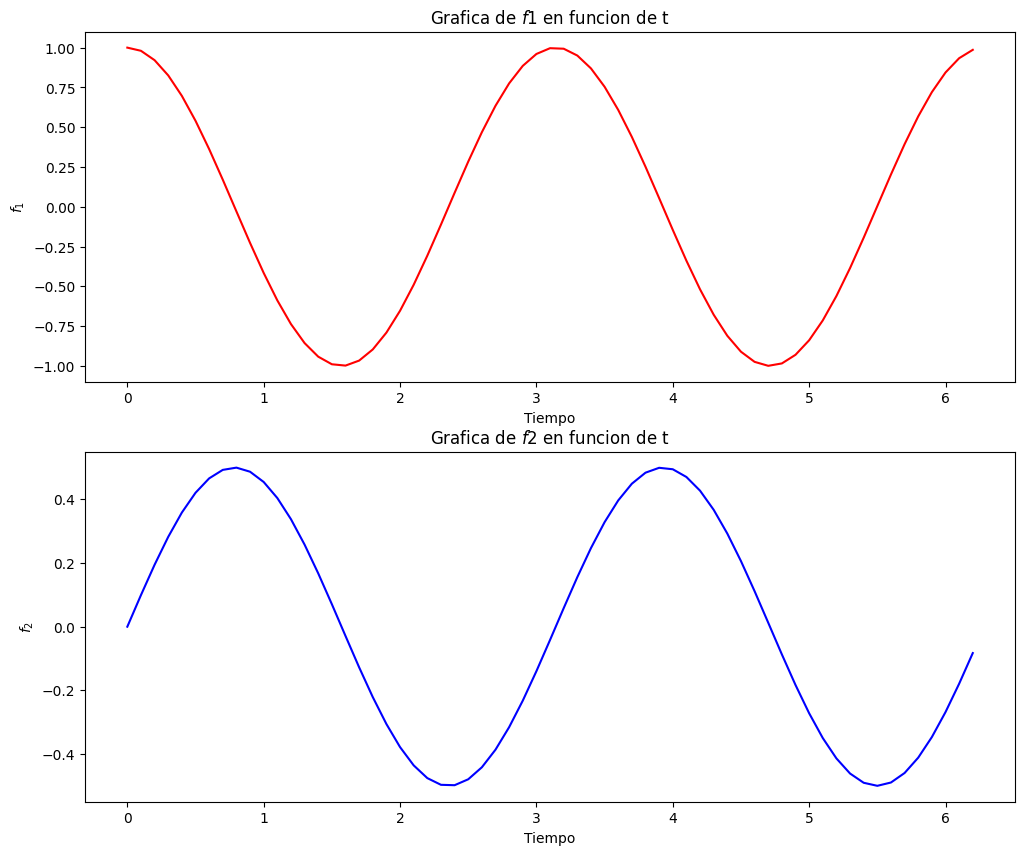

In [ ]:
graficar("datos2")